In [1]:
import pandas as pd
import numpy as np
import os

import sys
sys.path.insert(0, '../Modules/')

import pose_estimation as pe

In [2]:
directory = '../../../MEGA/Data/Kinect Zeno/Kinect processed'
file_name = '2014-12-22_P007_Pre_004.pkl'

load_path = os.path.join(directory, file_name)
df = pd.read_pickle(load_path)

In [3]:
lower_part_types = ['HEAD', 'HIP', 'UPPER_LEG', 'KNEE', 'LOWER_LEG', 'FOOT']
lengths = [63.9626,   19.3718,   12.8402,   22.0421,   20.5768]
radii = [i for i in range(0, 30, 5)]

edges = np.matrix('0 1;  \
                   1 2;  \
                   2 3;  \
                   3 4;  \
                   4 5;  \
                   3 5;  \
                   1 3')


In [4]:
func = lambda x: pe.process_frame(x.to_dict(), lower_part_types, edges, lengths, radii)
best_pos_series = df.apply(func, axis=1)

../Modules/pose_estimation.py:201: RuntimeWarning: divide by zero encountered in double_scalars
  ratio_func  = lambda a, b: 1.0 / gen.norm_ratio(a, b)


In [5]:
# Each row i is a tuple containing the best positions for frame i
# Split each tuple into columns of a dataframe
df_best_pos = pd.DataFrame(best_pos_series.values.tolist(), columns=['Side A', 'Side B'])

In [10]:
df_best_pos = df_best_pos.dropna()

In [11]:
# Extract the head and feet positions
head_pos = df_best_pos['Side A'].apply(lambda row: row[0, :])
L_foot_pos = df_best_pos['Side A'].apply(lambda row: row[-1, :])
R_foot_pos = df_best_pos['Side B'].apply(lambda row: row[-1, :])

# Combine into new dataframe
df_head_feet = pd.concat([head_pos, L_foot_pos, R_foot_pos], axis=1) 
df_head_feet.columns = ['HEAD', 'L_FOOT', 'R_FOOT']
df_head_feet.index.name = 'Frame'

In [12]:
foot_dist = df_head_feet.apply(lambda row: np.linalg.norm(row['L_FOOT'] - row['R_FOOT']), axis=1)

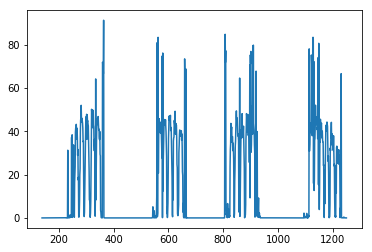

In [16]:
%matplotlib inline
p

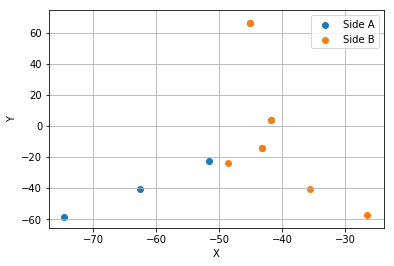

In [22]:
frame = 624

points_A = df_best_pos.loc[frame, 'Side A']
points_B = df_best_pos.loc[frame, 'Side B']

plt.figure()
plt.scatter(points_A[:, 0], points_A[:, 1])
plt.scatter(points_B[:, 0], points_B[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(('Side A', 'Side B'))
plt.grid()


In [24]:

def filter_parts(df, part_types):
    
    include_columns = np.array([False for part in df])
    for part_type in part_types:
        include_columns = include_columns | [part_type in part for part in df]
    
    return df.loc[:, include_columns]

df_lower_body = filter_parts(df, lower_part_types)

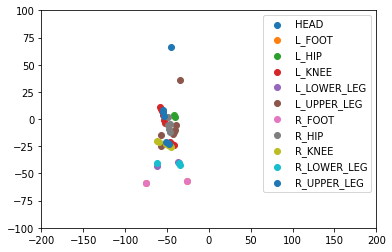

In [43]:

frame = 624

for part in df_lower_body:
    part_points = df_lower_body.loc[frame, part]
    plt.scatter(part_points[:, 0], part_points[:, 1])

plt.xlim(-200, 200)
plt.ylim(-100, 100)
plt.legend(df_lower_body.columns);

In [57]:
file_name = '2014-12-22_P007_Pre_004_conf'

load_path_conf = os.path.join(directory, file_name)
df_conf = pd.read_pickle(load_path_conf)